In [25]:
# Import libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the base URLs for each repository
dataverse_url = "https://dataverse.harvard.edu/api/search?q=*"
zenodo_url = "https://zenodo.org/api/records"
dryad_url = "https://datadryad.org/api/v2/datasets"
pennsieve_url = "https://api.pennsieve.io/discover/search/datasets"

dataverse_api_key = os.environ.get("DATAVERSE_API_KEY")
pennsieve_api_key = os.environ.get("PENNSIEVE_API_KEY")

# Define the parameters for each repository
dataverse_params = {"type": "dataset", "per_page": 10}
zenodo_params = {"type": "dataset"}
dryad_params = {"page": 1}
pennsieve_params = {"model": "package", "limit": 10}

# Define the headers for each repository
dataverse_headers = { "Content-Type": "application/json", "Accept": "application/json", "X-Dataverse-key": dataverse_api_key}
zenodo_headers = { "Content-Type": "application/json"}
dryad_headers = {"Accept": "application/json", "Content-Type": "application/json"}
pennsieve_headers = { "Content-Type": "application/json", "Accept": "application/json", }

# Define the lists to store the results
repositories = ["dataverse.harvard", "google dataset search", "zenodo", "dryad", "pennsieve"]
repositories_sizes = {}




In [26]:
# Loop through each repository and get the number of datasets and files
for repo in repositories:
    # Set the URL, params, and headers according to the repo
    if repo == "dataverse.harvard":
        url = dataverse_url
        params = dataverse_params
        headers = dataverse_headers
    elif repo == "google dataset search":
        # Skip the request to google dataset and use the number from the blog post
        num_datasets = 31000000 # Approximate number from https://ai.googleblog.com/2020/08/an-analysis-of-online-datasets-using.html
        repositories_sizes[repo] =num_datasets
        continue # Skip the rest of the loop for this repo
    elif repo == "zenodo":
        url = zenodo_url
        params = zenodo_params
        headers = zenodo_headers
    elif repo == "dryad":
        url = dryad_url
        params = dryad_params
        headers = dryad_headers
    elif repo == "pennsieve":
        url = pennsieve_url
        params = pennsieve_params
        headers = pennsieve_headers
    else:
        print(f"Error: {repo} is not a valid repository")
        continue 
    # Send a GET request to the URL with the params and headers
    response = requests.get(url, params=params, headers=headers)
    print(response.url)
    print(response.text) 
    # Check if the response is successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        try:
            # Get the number of datasets from the response
            if repo == "dataverse.harvard":
                num_datasets = data["data"]["total_count"]
            elif repo == "zenodo":
                num_datasets = data["hits"]["total"]
            elif repo == "dryad":
                num_datasets = data["total"]
            elif repo == "pennsieve":
                num_datasets = data["totalCount"]
            else:
                print(f"Error: {repo} is not a valid repository")
                continue
            
            # Append the number of datasets to the list
            repositories_sizes[repo] =num_datasets
            
            # Initialize the number of files to zero
            
          
        except TypeError as e:
            print(f"TypeError: {e}")
            print(repo)
            print(url)
            print(f"Response: {response.text}") 
            pass
        except KeyError as e:
            print(f"KeyError : {e}") 
            print(repo)
            print(url)
            print(f"Response: {response.text}")
            pass    
        # Append the number of files to the list
    
    # If the response is not successful, print an error message and break the loop
    else:
        print(f"Error: {response.status_code}, {response.reason}, {response.url}, {response.text}")
        break



https://dataverse.harvard.edu/api/search?q=*&type=dataset&per_page=10
{"status":"OK","data":{"q":"*","total_count":164034,"start":0,"spelling_alternatives":{},"items":[{"name":"Replication Data for: Do Mandatory Seat Belt Laws Still Save Lives?","type":"dataset","url":"https://doi.org/10.7910/DVN/CJPYDG","global_id":"doi:10.7910/DVN/CJPYDG","description":"This dataset contains the raw data and statistical code to replicate the analyses in the draft paper, Harper S, Strumpf EC. \"Do Mandatory Seat Belt Laws Still Save Lives?\"","published_at":"2016-07-27T20:15:32Z","publisher":"Sam Harper Dataverse","citationHtml":"Harper, Sam, 2015, \"Replication Data for: Do Mandatory Seat Belt Laws Still Save Lives?\", <a href=\"https://doi.org/10.7910/DVN/CJPYDG\" target=\"_blank\">https://doi.org/10.7910/DVN/CJPYDG</a>, Harvard Dataverse, V2, UNF:6:80e5IlxTWNx+fpFiP/b39g== [fileUNF]","identifier_of_dataverse":"samharper","name_of_dataverse":"Sam Harper Dataverse","citation":"Harper, Sam, 2015, \"Re

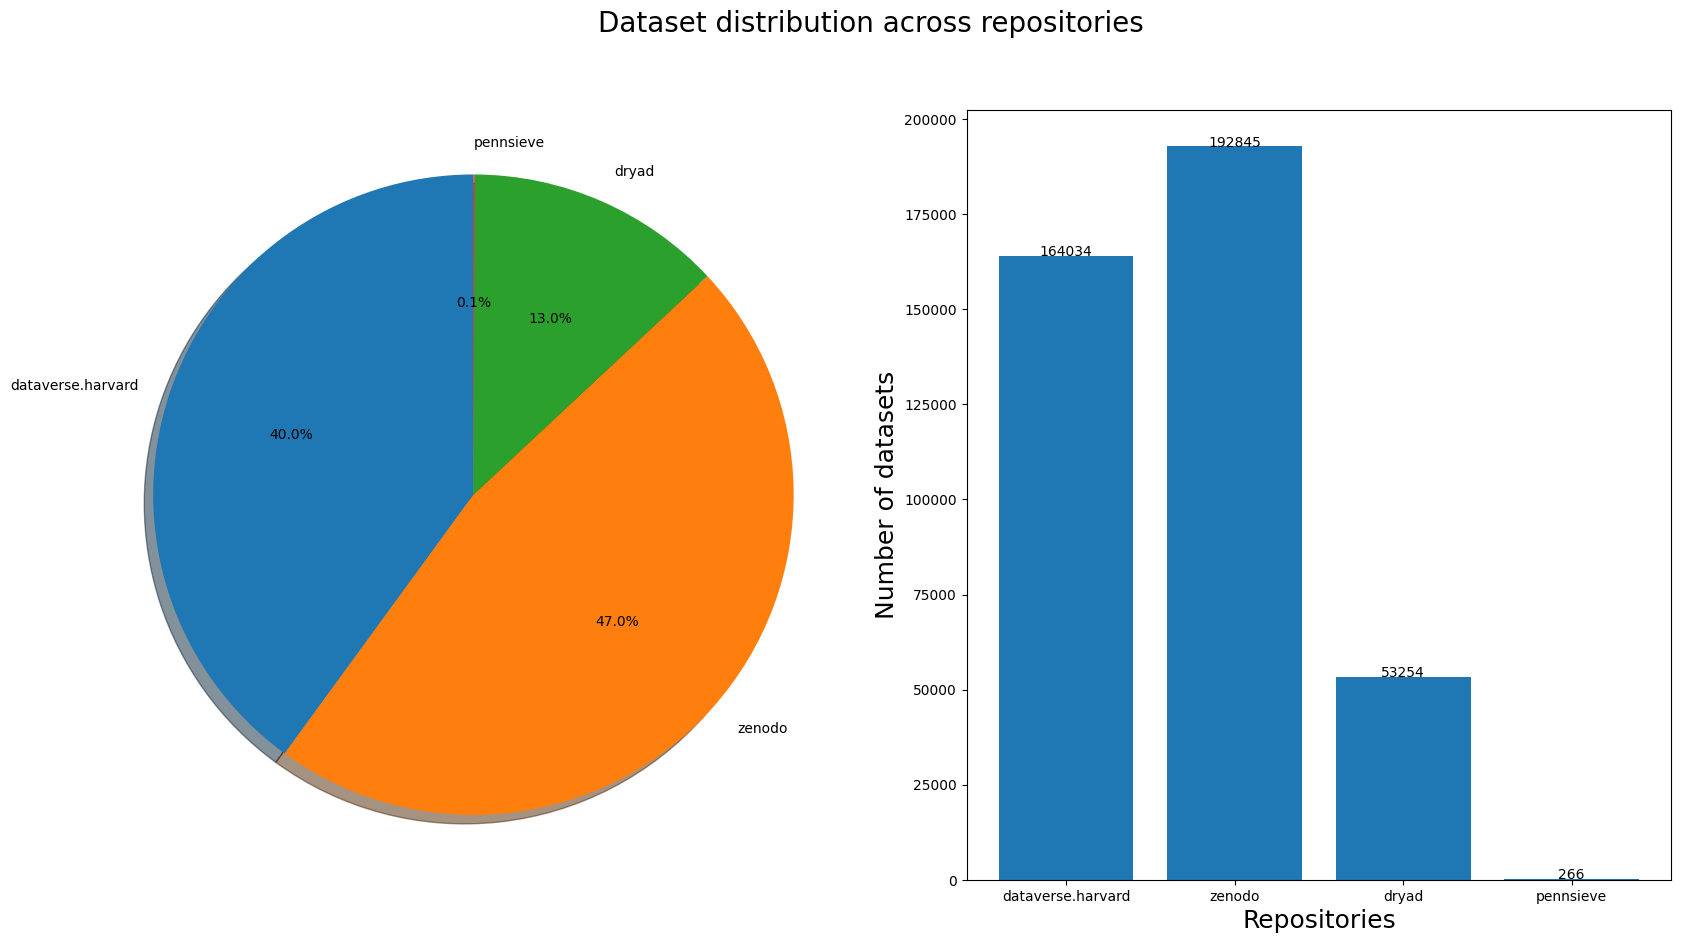

In [30]:
#plot values from dictionary
df = pd.DataFrame.from_dict(repositories_sizes, orient='index', columns=['datasets'])
#delete google dataset search from the dataframe
df = df.drop(['google dataset search'])


#plot the values as pie chart and bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Dataset distribution across repositories', fontsize=20)
ax1.pie(df['datasets'], labels=df.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax2.bar(df.index, df['datasets'])
ax2.set_xlabel('Repositories', fontsize=18)
ax2.set_ylabel('Number of datasets', fontsize=18)
#add label with values on top of each bar
for index, value in enumerate(df['datasets']):
    plt.text(index, value, str(value), ha='center')


plt.show()
